In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
trans = [
    "airplane",									
    "automobile",									
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


frog


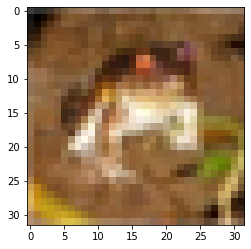

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 0
print(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
from tensorflow.keras.models import Sequential
# cNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# MLP
from tensorflow.keras.layers import Dense, Flatten
l = [
     # filter數目, filter大小(3 * 3)
     # 1 filter(27) * 64(#) + 64(bias)
     Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
     MaxPooling2D(),
     # 1 filter(576) * 128(#) + 128
     Conv2D(128, 3, padding="same", activation="relu"),
     MaxPooling2D(),
     Conv2D(256, 3, padding="same", activation="relu"),
     MaxPooling2D(),
     Flatten(),
     Dense(256, activation="relu"),
     Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

In [0]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
# sparse: 你自己不用做one-hot encoding, 可以省ram
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [0]:
# 預處理
import numpy as np
x_train_norm = x_train / 255
x_test_norm = x_test / 255

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# batch_size: 問多少個人再做一次調整(圖片小:100~200, 圖片大: 5~50)
# epochs: 看完所有資料就叫一個epoch
# validation_split: 驗證資料決定你的模型什麼時候最好
# verbose: 2沒有進度條
c = [
     EarlyStopping(patience=5, restore_best_weights=True),
     # 手動儲存: model.save("mlp.h5")
     ModelCheckpoint("cnn.h5", save_best_only=True)
]
model.fit(x_train_norm,
          y_train,
          batch_size=200,
          epochs=100,
          validation_split=0.1,
          verbose=2,
          callbacks=c)

Epoch 1/100
225/225 - 8s - loss: 1.5722 - accuracy: 0.4339 - val_loss: 1.2591 - val_accuracy: 0.5446
Epoch 2/100
225/225 - 7s - loss: 1.1042 - accuracy: 0.6109 - val_loss: 0.9767 - val_accuracy: 0.6558
Epoch 3/100
225/225 - 7s - loss: 0.8950 - accuracy: 0.6871 - val_loss: 0.8629 - val_accuracy: 0.7030
Epoch 4/100
225/225 - 7s - loss: 0.7772 - accuracy: 0.7306 - val_loss: 0.8164 - val_accuracy: 0.7258
Epoch 5/100
225/225 - 7s - loss: 0.6704 - accuracy: 0.7681 - val_loss: 0.7304 - val_accuracy: 0.7584
Epoch 6/100
225/225 - 7s - loss: 0.5779 - accuracy: 0.8008 - val_loss: 0.7453 - val_accuracy: 0.7530
Epoch 7/100
225/225 - 7s - loss: 0.5038 - accuracy: 0.8242 - val_loss: 0.7331 - val_accuracy: 0.7590
Epoch 8/100
225/225 - 7s - loss: 0.4244 - accuracy: 0.8536 - val_loss: 0.7179 - val_accuracy: 0.7668
Epoch 9/100
225/225 - 7s - loss: 0.3483 - accuracy: 0.8781 - val_loss: 0.7837 - val_accuracy: 0.7622
Epoch 10/100
225/225 - 7s - loss: 0.2808 - accuracy: 0.9043 - val_loss: 0.8249 - val_accura

In [14]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7808 - accuracy: 0.7419


[0.7807942628860474, 0.7419000267982483]

In [17]:
# predict: predict機率
# predict_classes: 類別
pre = model.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 8, ..., 5, 4, 7])

In [19]:
import pandas as pd
from sklearn.metrics import confusion_matrix
# in tensorflow: one-hot encoding
# not tensorflow: original
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
             columns=["{}(預測)".format(i) for i in trans],
             index=["{}(真實)".format(i) for i in trans])

,airplane(預測),automobile(預測),bird(預測),cat(預測),deer(預測),dog(預測),frog(預測),horse(預測),ship(預測),truck(預測)
airplane(真實),737,20,50,39,39,20,6,12,46,31
automobile(真實),10,841,4,15,6,12,6,3,13,90
bird(真實),42,2,551,97,109,101,49,36,7,6
cat(真實),13,4,29,625,63,190,31,31,2,12
deer(真實),2,2,23,70,747,52,33,63,6,2
dog(真實),4,2,15,167,41,713,9,44,4,1
frog(真實),1,4,28,106,38,55,757,7,2,2
horse(真實),6,1,13,46,60,72,3,794,1,4
ship(真實),35,40,14,27,18,10,3,6,820,27
truck(真實),24,51,7,20,4,20,3,15,22,834


In [25]:
print("before:", y_test.shape)
print("pre:", pre.shape)
y_test_reshape = y_test.reshape(-1)
print("after:", y_test_reshape.shape)

before: (10000, 1)
pre: (10000,)
after: (10000,)


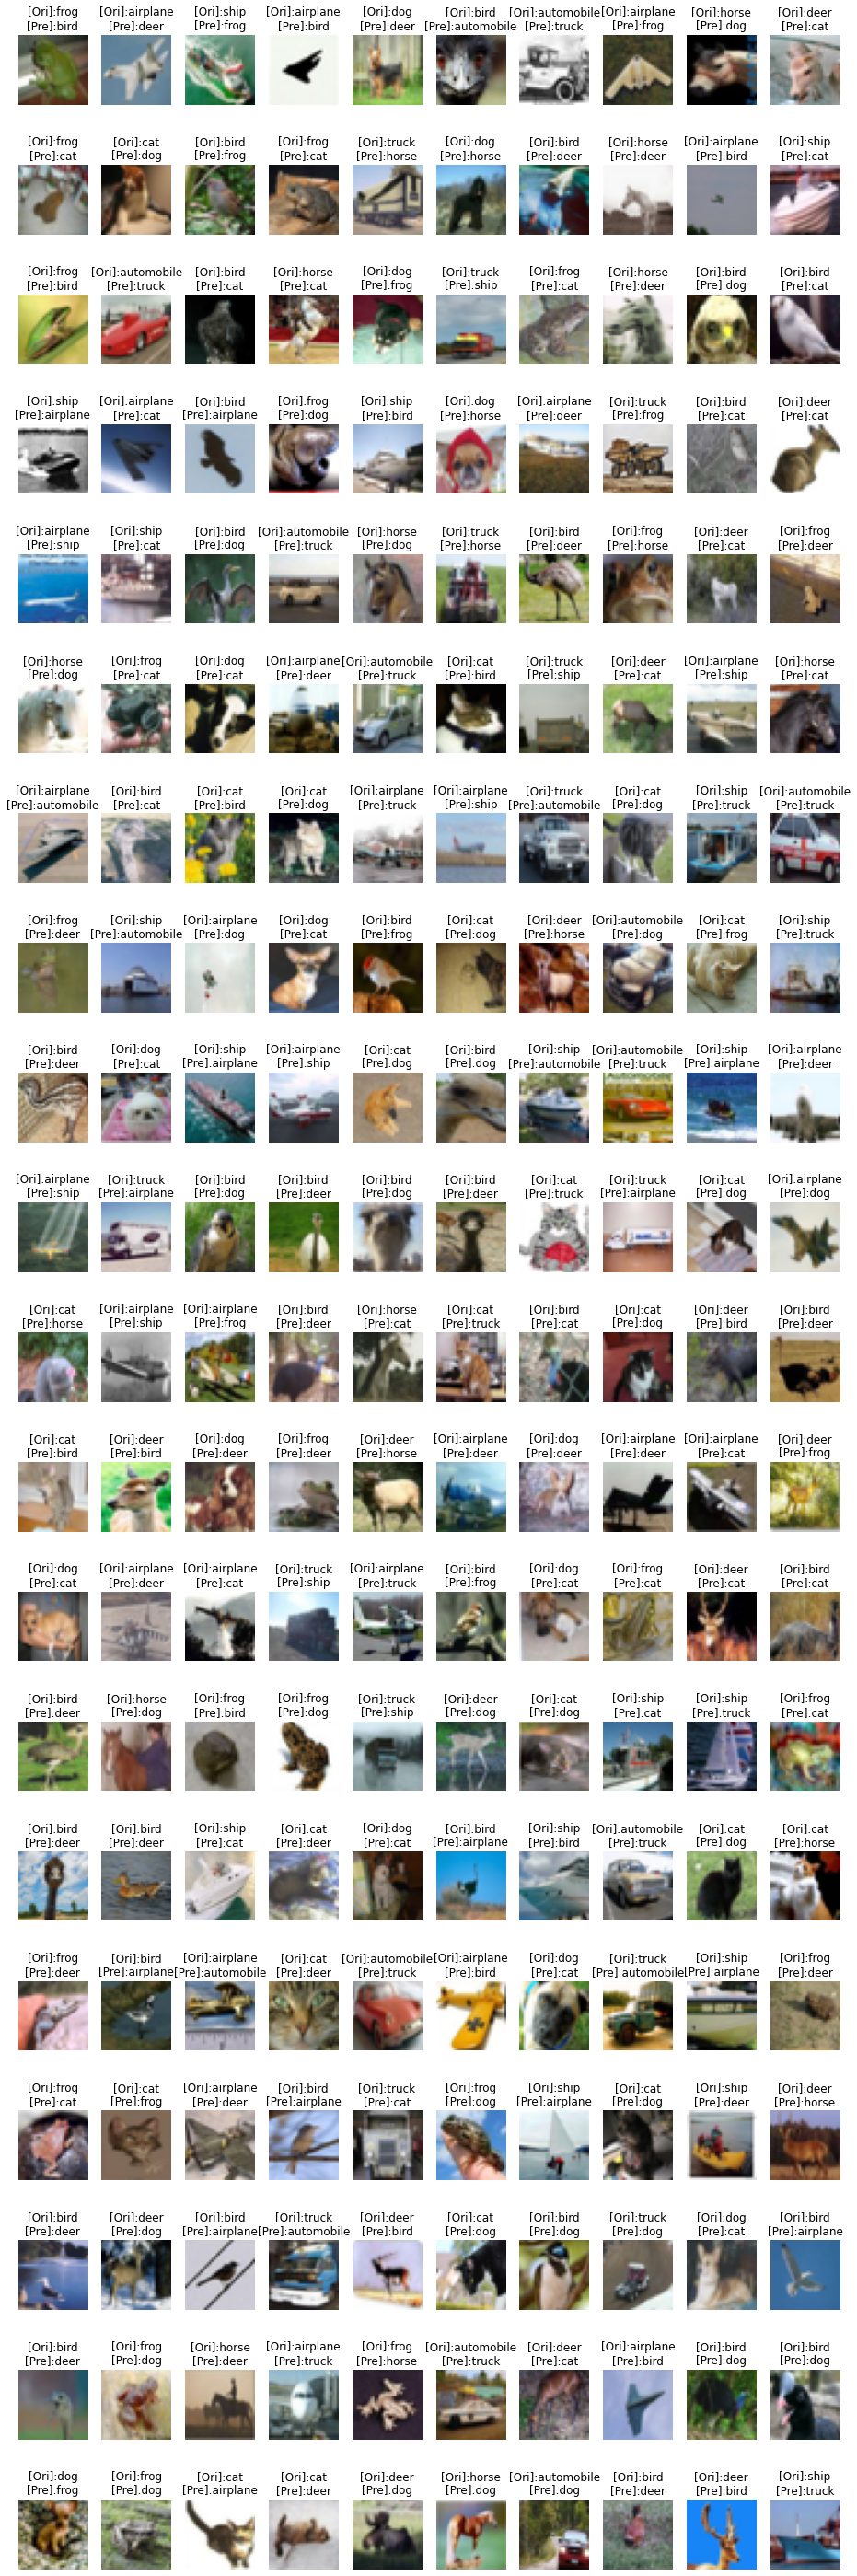

In [26]:
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test_reshape[idx]
false_pre = pre[idx]

plt.figure(figsize=(16, 54))
width = 10
height = len(false_img) // width + 1
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[Ori]:{}\n[Pre]:{}".format(trans[false_label[i]], 
                                    trans[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

檔名:test.png
預測: airplane


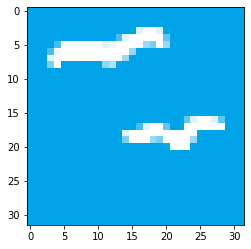

In [28]:
from tensorflow.keras.preprocessing.image import load_img
f = input("檔名:")
# L: 灰階
img = load_img(f, target_size=(32, 32))
img_np = np.array(img)
x = img_np.reshape(-1, 32, 32, 3) / 255
pre = model.predict_classes(x)[0]
print("預測:", trans[pre])
plt.imshow(img_np)